In [1]:
# [분산분석] -- ANOVA(analysis of variance)
# 두 개 이상의 집단에서 그룹 평균 간 차이를 그룹 내 변동에 비교하여 살펴보는 통계 분석 방법

# 일원배치 분산분석의 가정
# 1. 각 집단의 측정치는 서로 독립적이며, 정규분포를 따른다.
# 2. 각 집단 측정치의 분산은 같다. (등분산 가정)
# H0(귀무가설): k개의 집단 간 모평균에는 차이가 없다.
# H1(대립가설): k개의 집단 간 모평균이 모두 같다고 할 수 없다.

# [사후 검정]
# 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명된 경우,
# 어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석

In [2]:
# iris 데이터를 이용하여 종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균이 같은지 혹은 차이가 있는지 확인
# H0: 세 가지 종에 대해 Sepal.Width의 평균은 모두 같다.
# H1: 적어도 하나의 종에 대한 Sepal.Width의 평균값에는 차이가 있다.

In [3]:
# iris data load
from sklearn.datasets import load_iris
iris = load_iris()
data_iris = iris['data']

In [4]:
# data arrange
import pandas as pd
iris_df = pd.DataFrame(data_iris)
iris_df.columns = iris['feature_names']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# iris['target']
data_df = pd.DataFrame([iris['target'], iris_df['sepal width (cm)']])
data_df = data_df.transpose()
data_df.columns = ['target', 'sepal width (cm)']

In [6]:
group_0= data_df[data_df.target == 0.0]
group_1= data_df[data_df.target == 1.0]
group_2= data_df[data_df.target == 2.0]
group_0.reset_index(drop=True, inplace=True)
group_1.reset_index(drop=True, inplace=True)
group_2.reset_index(drop=True, inplace=True)

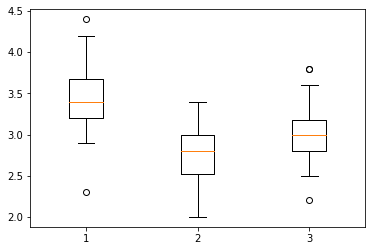

In [7]:
# 그려보기 
import matplotlib.pyplot as plt

plot_data = [group_0['sepal width (cm)'], group_1['sepal width (cm)'], group_2['sepal width (cm)']] 
ax = plt.boxplot(plot_data) 
plt.show()

In [8]:
# one way ANOVA 수행
import scipy.stats as stats

stats.f_oneway(group_0['sepal width (cm)'], group_1['sepal width (cm)'], group_2['sepal width (cm)'])

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

In [9]:
# p-value값이 매우 작게 나와 유의수준 0.05 하에서 귀무가설을 기각한다.
# 적어도 하나의 종에 대한 Sepal.Width의 평균값에는 차이가 있다고 말할 수 있다.

In [10]:
# 세 가지 종들 중 특히 어떠한 종들 간에 꽃받침의 폭에 차이가 있는지를 파악하기 위해 사후검정을 수행해보자

In [11]:
# tukey hsd를 이용한 사후 검정 (변수가 param 0, 그룹이 param 1)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(data_df['sepal width (cm)'], data_df['target'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   -0.658  0.001 -0.8189 -0.4971   True
   0.0    2.0   -0.454  0.001 -0.6149 -0.2931   True
   1.0    2.0    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------


In [12]:
# 결과를 보면 각 그룹간 p-value 값이 0.005보다 작으므로 각각의 비교에 대한 귀무가설을 모두 기각한다.
# 즉 모든 종들에 대해서 꽃받침 폭의 평균값은 통계적으로 유의한 차이가 있다고 할 수 있다.
# 또한 meandiff를 보면 0그룹과 1그룹간 차이의 크기가 0.658로 가장 크다고 할 수 있다.